In [1]:
pwd

'C:\\Python Files\\AluminaConcEstimator\\NoteBooks'

In [2]:
import sys
sys.path.append('../')

In [3]:
# Do imports first
import Global as Glob
import Model as Mod
import numpy as np
import pandas as pd
import StateSimulation as StateSim
import UnscentedKalmanFilterSim as UKFSim

In [4]:
# define model at 5 sec intervals
dt = 5
(F, G, H, B) = Mod.StateEquations(dt)

In [5]:
# Define the UKF noise standard deviations
q1dstd = 0.001    # alumina concentration variation
q1ustd = 0.001  # undisolved alumina concentration variation
q2std = 0.0000005  # acd varation needs to be much lower
# array of state variation terms
qstd = np.array([[q1dstd], [q1ustd], [q2std]])
rstd = 0.01       # measurement variation (volts)

In [6]:
# start with initial concentrations at end of previous underfeed of:
# 2.3% dissolved
# 0.5% undissolved
# starting ACD of 26.1 mm
x0 = np.array([[2.3], [0.5], [2.6093]])

In [7]:
def LoadData(filename: str):
    # This is a quick loader - not finalised
    celldata = pd.read_csv(filename, sep=',')
    npcelldata = celldata.to_numpy()
    dims = np.shape(npcelldata)
    tsteps = dims[0]
    udim = 3
    zdim = 1
    u = np.zeros((tsteps, udim, 1))
    z = np.zeros((tsteps, zdim, 1))
    for i in range(tsteps):
        VCell = npcelldata[i, 0]
        Iline = npcelldata[i, 1]
        feed = npcelldata[i, 3]
        beammove = npcelldata[i, 4]
        uobs = np.array([[Iline], [feed], [beammove]])
        u[i] = np.copy(uobs)
        zobs = np.array([[VCell]])
        z[i] = np.copy(zobs)
    return u, z

In [8]:
# load in actual data for input and observation
ut, zt = LoadData("C:/Python Files/AluminaConcEstimator/DataImport/excel prototype.csv")

In [9]:
np.shape(ut)

(2116, 3, 1)

In [10]:
np.shape(zt)

(2116, 1, 1)

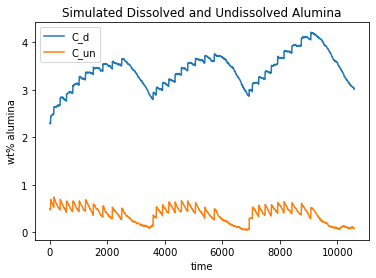

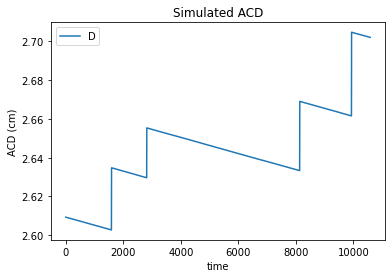

In [11]:
# simulate states with the true inputs, plot the results
xsim = StateSim.xtrue(F, G, B, qstd, x0, ut, dt, True)

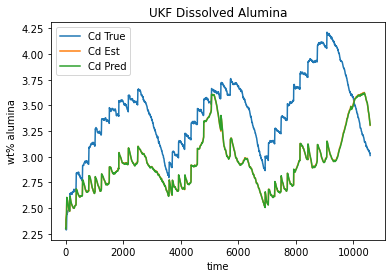

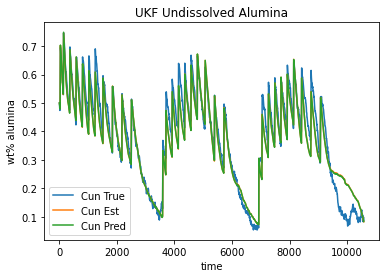

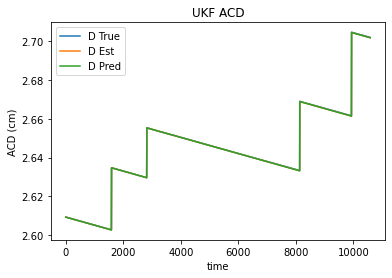

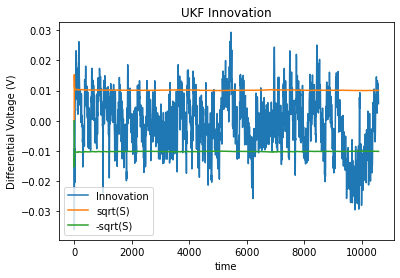

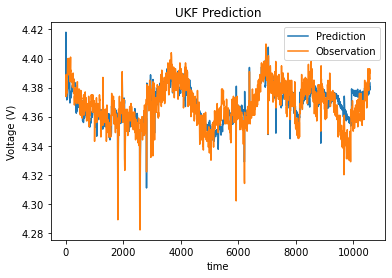

In [12]:
# Run the UKF SImulation using the nominal inputs
xest, Pest, xpred, Ppred, dz, S = UKFSim.ukf(F, G, H, B, qstd, rstd, zt, ut, x0, 0)
UKFSim.plot_ukf(xsim, zt, dz, xest, xpred, dt, S)

In [2]:
xpred

NameError: name 'xpred' is not defined